In [1]:
#importando as bibliotecas iniciais
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#importando bibliotecas para implementacao do modelo
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [8]:
df = sns.load_dataset('titanic').copy()   #seaborn já baixa o dataset

In [9]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [11]:
#renomeando a coluna alvo
df.rename(columns={'survived':'target'}, inplace=True)
df.head()

,target,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   target       891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [13]:
df.shape

(891, 15)

In [14]:
df.describe()

,target,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [16]:
#contando valores nulos por coluna
df.isna().sum().sort_values(ascending=False)

,0
deck,688
age,177
embarked,2
embark_town,2
sex,0
pclass,0
target,0
fare,0
parch,0
sibsp,0


In [17]:
#distribuicao da variável alvo
df.target.value_counts()

,count
target,
0,549
1,342


In [18]:
#proporcao da variável alvo
df.target.value_counts(normalize=True)

,proportion
target,
0,0.616162
1,0.383838


In [20]:
#preparando limpeza de dados
cols_modelo = [
    'pclass', 'sex', 'age', 'sibsp', 'parch',
    'fare', 'embarked', 'class', 'who', 'adult_male', 'alone', 'target'
]

df_modelo = df[cols_modelo].copy()

In [21]:
#tratamento de valores ausente
df_modelo.isna().sum()

,0
pclass,0
sex,0
age,177
sibsp,0
parch,0
fare,0
embarked,2
class,0
who,0
adult_male,0


In [24]:
#mudando age pela media
df_modelo.age.fillna(df_modelo.age.mean(), inplace=True)

/tmp/ipython-input-1143417444.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_modelo.age.fillna(df_modelo.age.mean(), inplace=True)


In [23]:
#mudando embarked pelo valor mais comum
df_modelo.embarked.fillna(df_modelo.embarked.mode()[0], inplace=True)

In [25]:
#one hot encoding para transformar variáveis categóricas em variáveis numericas
df_modelo = pd.get_dummies(df_modelo)

In [26]:
df_modelo.isna().sum().sum()

np.int64(0)

In [27]:
df_modelo.head()

,pclass,age,sibsp,parch,fare,adult_male,alone,target,sex_female,sex_male,embarked_C,embarked_Q,embarked_S,class_First,class_Second,class_Third,who_child,who_man,who_woman
0,3,22.0,1,0,7.2500,True,False,0,False,True,False,False,True,False,False,True,False,True,False
1,1,38.0,1,0,71.2833,False,False,1,True,False,True,False,False,True,False,False,False,False,True
2,3,26.0,0,0,7.9250,False,True,1,True,False,False,False,True,False,False,True,False,False,True
3,1,35.0,1,0,53.1000,False,False,1,True,False,False,False,True,True,False,False,False,False,True
4,3,35.0,0,0,8.0500,True,True,0,False,True,False,False,True,False,False,True,False,True,False


In [28]:
y = df_modelo['target']
X = df_modelo.drop('target', axis=1)

In [29]:
#dividindo entre treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [30]:
#treinando a árvore de decisao
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)
#previsoes
y_pred = clf.predict(X_test)

In [31]:
#avaliacao do modelo
print("Acurácia:", round(accuracy_score(y_test, y_pred), 4))
print("\nRelatório de classificação:\n", classification_report(y_test, y_pred, digits=3))
print("Matriz de confusão:\n", confusion_matrix(y_test, y_pred))

Acurácia: 0.7654

Relatório de classificação:
               precision    recall  f1-score   support

           0      0.800     0.800     0.800       105
           1      0.716     0.716     0.716        74

    accuracy                          0.765       179
   macro avg      0.758     0.758     0.758       179
weighted avg      0.765     0.765     0.765       179

Matriz de confusão:
 [[84 21]
 [21 53]]


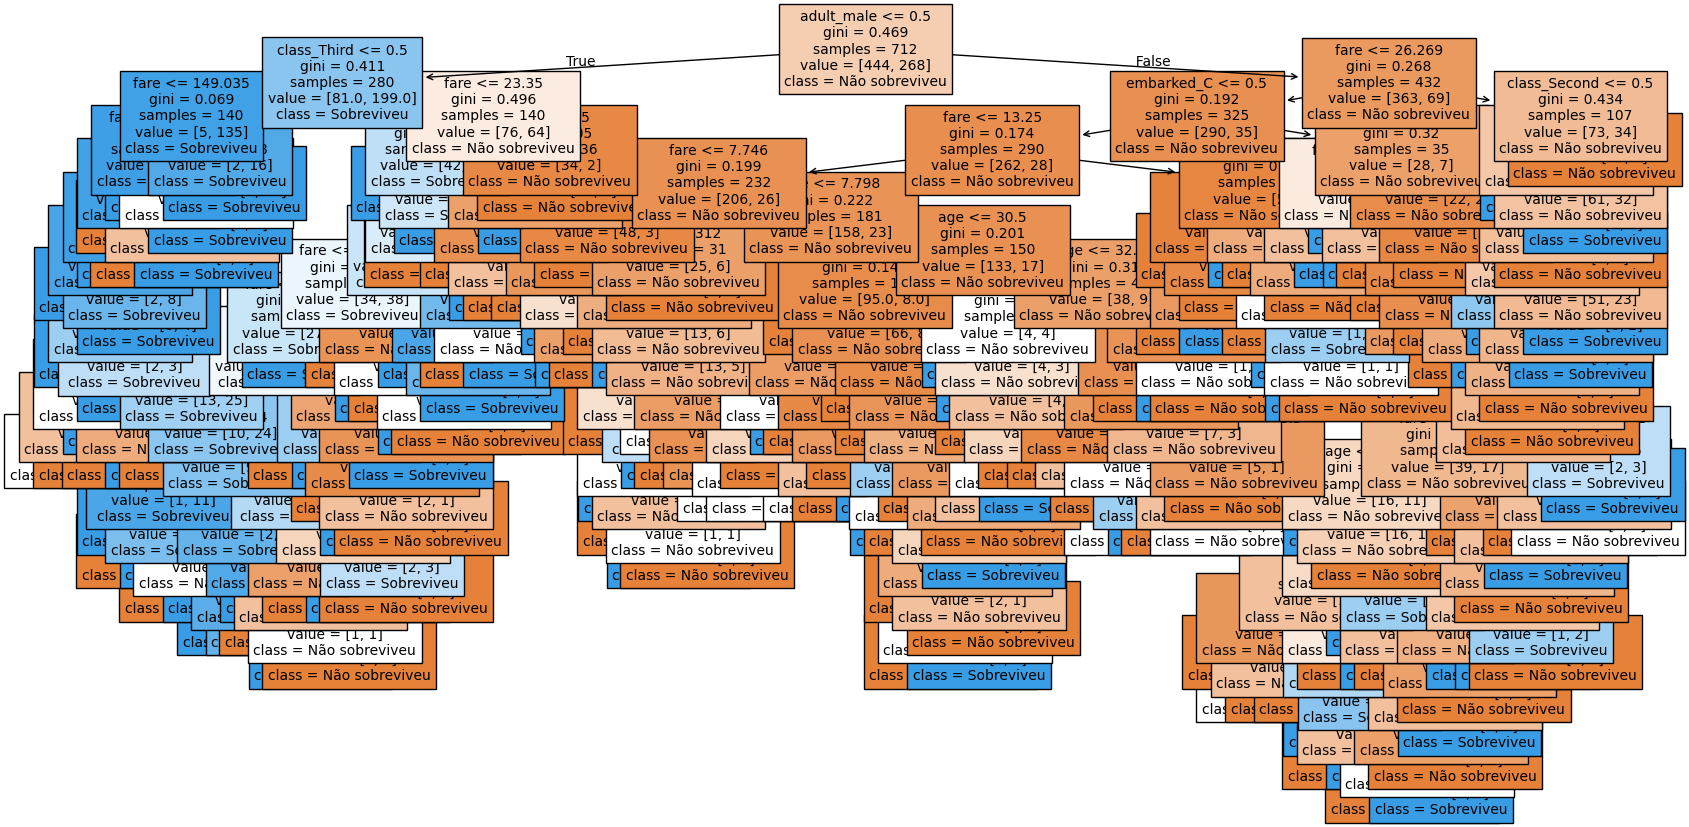

In [32]:
plt.figure(figsize=(20,10))
plot_tree(
    clf,
    feature_names=X.columns,
    class_names=['Não sobreviveu', 'Sobreviveu'],
    filled=True,
    fontsize=10
)
plt.show()